In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
from scipy.stats import bootstrap

In [14]:
df = pd.read_csv("dataset.csv", sep=';')

In [15]:
df_a = df.query("testgroup =='a' and revenue > 0").drop(columns=['testgroup'])
df_b = df.query("testgroup =='b' and revenue > 0").drop(columns=['testgroup'])

In [30]:
df_a.head(3)

,user_id,revenue
72,73,351
341,342,290
385,386,250


In [17]:
df_b.head(3)

,user_id,revenue
160,161,3797
377,378,3768
386,387,3527


In [18]:
n = 10000

**Метод: Есть два датафрейма с выборками, нужно посчитать медианы в каждой, сравнить доверительные интервалы**

In [26]:
# количество bootstrap итераций 
n = 10000

# пустые массивы в которые будут записывать медианы 
medians_a = []
medians_b = []

# цикл bootstrap
for i in range (n):
    
    # вынимаем случайные строки с повторением и создаем новый датафрейм
    sample_data_a = df_a.sample(frac=1, replace=True)
    sample_data_b = df_b.sample(frac=1, replace=True)
    
    # в столбце с исследуемыми значениями считаем медиану
    sample_median_a = sample_data_a.revenue.median()
    sample_median_b = sample_data_b.revenue.median()
    
    # записываем медиану в массив где хранятся медианы всех итераций
    medians_a.append(sample_median_a)
    medians_b.append(sample_median_b)

# переводим массив в pandas series
medians_a = pd.Series(medians_a)
medians_b = pd.Series(medians_b)

# строим доверительный интервал
medians_a_dov = medians_a[(medians_a > medians_a.quantile(0.025)) & (medians_a < medians_a.quantile(0.975))]
medians_b_dov = medians_b[(medians_b > medians_b.quantile(0.025)) & (medians_b < medians_b.quantile(0.975))]

<AxesSubplot:ylabel='Count'>

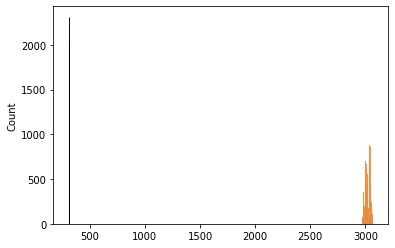

In [29]:
# строим граффик
sns.histplot(data=medians_a_dov)
sns.histplot(data=medians_b_dov)

<AxesSubplot:ylabel='Count'>

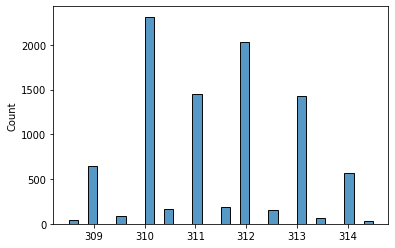

In [31]:
sns.histplot(data=medians_a_dov)

<AxesSubplot:ylabel='Count'>

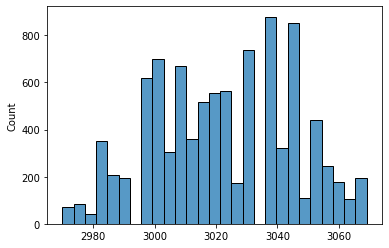

In [28]:
sns.histplot(data=medians_b_dov)

**Метод: рассчитан на такой же результат как и предыдущий метод, но вычитает медианы при каждой итерации**

In [34]:
n = 10000
medians_deff = []
for i in range (n):
    sample_data_a = df_a.sample(frac=1, replace=True)
    sample_data_b = df_b.sample(frac=1, replace=True)
    medians_deff.append(sample_data_a.revenue.median() - sample_data_b.revenue.median())
medians_deff = pd.Series(medians_deff)

In [35]:
medians_final = medians_deff[(medians_deff > medians_deff.quantile(0.025)) & (medians_deff < medians_deff.quantile(0.975))]

<AxesSubplot:ylabel='Count'>

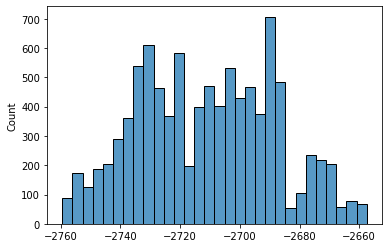

In [37]:
sns.histplot(data= medians_final)

**Метод: bootstrap из библиотеки scipy**

In [38]:
bootstrap((df_a['revenue'], ), np.median, confidence_level=0.9, method='percentile',n_resamples=10000)

BootstrapResult(confidence_interval=ConfidenceInterval(low=308.0, high=314.0), standard_error=1.8228956888339052)

In [39]:
bootstrap((df_b['revenue'], ), np.median, confidence_level=0.9, method='percentile',n_resamples=10000)

BootstrapResult(confidence_interval=ConfidenceInterval(low=2981.0, high=3064.0), standard_error=26.22254818287728)